# Preprocessing_Classifier

### Import Modules

In [21]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential

from pathlib import Path

import numpy as np
import nibabel as nib

from matplotlib import pyplot as plt
import imageio

Ignore : warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"

In [22]:
__file__ = 'Preprocessing_classifier.ipynb'
BASE_DIR = Path(__file__).resolve().parent
PARENT_DIR = BASE_DIR.parent

In [23]:
lib_path = PARENT_DIR / "Classification"
import sys
sys.path.insert(0,str(lib_path))
from lib.Classifier_Preprocessing import *

## Import MRI and convert into a numpy array

In [24]:
path_flair = BASE_DIR / "Classifier_prediction" / "BraTS20_Training_001/BraTS20_Training_001_flair.nii"
path_t1 = BASE_DIR / "Classifier_prediction" / "BraTS20_Training_001/BraTS20_Training_001_t1.nii"
path_t1ce = BASE_DIR / "Classifier_prediction" / "BraTS20_Training_001/BraTS20_Training_001_t1ce.nii"
path_t2 = BASE_DIR / "Classifier_prediction" / "BraTS20_Training_001/BraTS20_Training_001_t2.nii"

In [25]:
nii_img = nib.load(path_t1ce)
nii_img_data = nii_img.get_fdata()

np_array = np.array(nii_img_data)
np_array.shape

(240, 240, 155)

In [26]:
def slice_number(numbers, axis, np_array_img):
    """
    Select the number of layers according to the number table and the axis from the center of the MRI

    Args:
        numbers ([int]): number of slices to be extracted in positive
        axis (int): x = 0, y = 1, z = 2
        np_array_img : np array du mri

    Returns:
        ([]) : table of slices selected numbers
    """

    # Calculation of the length according to the axis of the MRI
    if axis == 2:
        length = len(np_array_img[1][1])
    else:
        length = len(np_array_img[1])

    slice_numbers = []
    for i, number in enumerate(numbers):
        if i == 1:
            slice_numbers.append(int(length / 2))
        slice_numbers.append(int(length / 2) + number)
        slice_numbers.append(int(length / 2) - number)
    return slice_numbers

In [27]:
slice_numbers_x = slice_number([5, 10], axis=0, np_array_img=np_array)
slice_numbers_y = slice_number([5, 10], axis=1, np_array_img=np_array)
slice_numbers_z = slice_number([5, 10], axis=2, np_array_img=np_array)

In [28]:
print(slice_numbers_x)
print(slice_numbers_y)
print(slice_numbers_z)

[125, 115, 120, 130, 110]
[125, 115, 120, 130, 110]
[82, 72, 77, 87, 67]


In [29]:
def create_slices(slice_numbers: [int], axis: int, np_array_img) -> []:
    """
    Extract the slices from the MRI according to the axis

    Args:
        slice_numbers ([int]): slice numbers
        axis (int): x = 0, y = 1, z = 2
        np_array_img : np array du mri

    Returns:
        ([]) : tab of the slices in np_array_img
    """
    slices = []
    for i, number in enumerate(slice_numbers):
        if axis == 0:
            slices.append(np_array_img[number, :, :])
        elif axis == 1:
            slices.append(np_array_img[:, number, :])
        else:
            slices.append(np_array_img[:, :, number])
    return slices

In [30]:
slices_x = create_slices(slice_numbers_x, axis=0, np_array_img=np_array)
slices_y = create_slices(slice_numbers_y, axis=1, np_array_img=np_array)
slices_z = create_slices(slice_numbers_z, axis=2, np_array_img=np_array)

## Show slices

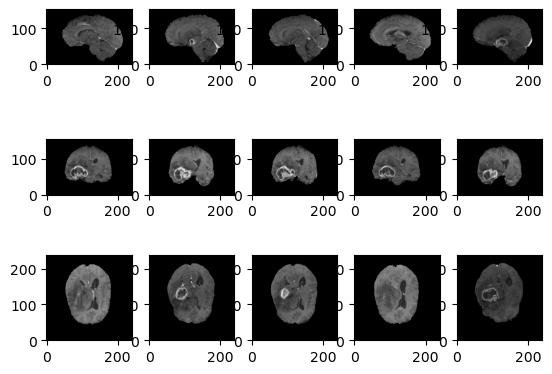

In [31]:
show_slices(slices_x[:], slices_y[:], slices_z[:])

## Cropping the slices

In [32]:
# Crop the slices
for nb_slices in range(0, len(slices_x)):
    slices_x[nb_slices] = crop_slices(slices_x[nb_slices])
for nb_slices in range(0, len(slices_y)):
    slices_y[nb_slices] = crop_slices(slices_y[nb_slices])
for nb_slices in range(0, len(slices_z)):
    slices_z[nb_slices] = crop_slices(slices_z[nb_slices])


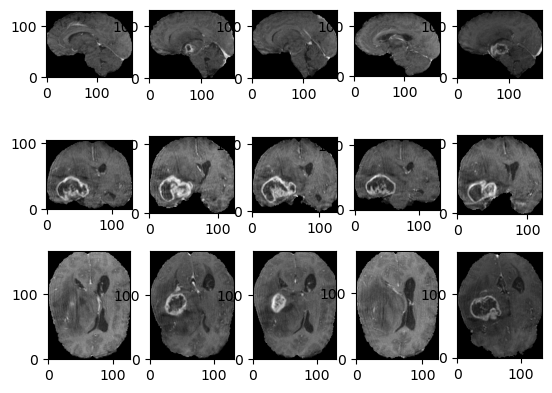

In [33]:
show_slices(slices_x[:], slices_y[:], slices_z[:])

## Save the slices

In [34]:
def save_all_slices(slices_x: [], slices_y: [], slices_z: [], path_dir='save/'):
    """
    Save all the slices in directory save/axis_*/

    Args:
        slices_x ([]): tab slices of x-axis
        slices_y ([]): tab slices of y-axis
        slices_z ([]): tab slices of z-axis

    Returns:
        (bool) : Return True if the images are saved and False if there are an error
    """
    path_x = f"{path_dir}/x_axis"
    path_y = f"{path_dir}/y_axis"
    path_z = f"{path_dir}/z_axis"

    if not os.path.exists(path_x):
        os.makedirs(path_x)
    if not os.path.exists(path_y):
        os.makedirs(path_y)
    if not os.path.exists(path_z):
        os.makedirs(path_z)

    try:
        for i, slice in enumerate(slices_x):
            path = path_x + f"/slice_x_{i}.jpeg"
            plt.imsave(path, np.rot90(slice), cmap="gray")
        for i, slice in enumerate(slices_y):
            path = path_y + f"/slice_y_{i}.jpeg"
            plt.imsave(path, np.rot90(slice), cmap="gray")
        for i, slice in enumerate(slices_z):
            path = path_z + f"/slice_z_{i}.jpeg"
            plt.imsave(path, np.rot90(slice), cmap="gray")
        return True
    except:
        return False

In [35]:
path_dir = BASE_DIR / "save"

print(save_all_slices(slices_x[:], 
                      slices_y[:], 
                      slices_z[:],
                      path_dir= str(path_dir)))

True
